In [80]:

import numpy as np

def normal_generator( n):
    # Parameters
    mean = 73
    std_dev = 30.2
    # Replace with the desired number of samples
    lower_limit = 0
    upper_limit = 142
    # Generate n samples from a normal distribution
    samples = np.random.normal(loc=mean, scale=std_dev, size=n)

    # Clip the samples to the specified range [lower_limit, upper_limit]
    samples = np.clip(samples, lower_limit, upper_limit)

    return samples

# Parameters


In [81]:
print(normal_generator(100))

[103.83459592  60.36694272  74.24735608  83.66128882 136.03750052
 116.49855941  75.32042552  60.63157369  35.01472246  88.6173138
  71.25299998 120.79021997   8.23176681  28.81656267  96.63855628
  17.00655803  65.25847739 108.91452597   8.39499701  28.04942049
 101.97345476  81.25568328  77.20016398  85.52963403  28.35024135
 116.49617187  80.28269     94.79715322  94.41642385   2.56650108
  72.65504932   9.17742786 140.18898356  62.31143146  58.84249012
  71.29793828  91.94580826  75.65435864  79.4847323   57.15792811
  28.52141499  50.08022798  54.6571119   97.4797219  102.67824368
  85.74747513  45.74338796 142.          70.19076633  43.67143726
  43.37890344  97.76257307  29.49583431  72.04647021  17.95788123
  54.74605171  69.6457645  125.61015324  80.90128941  48.62849689
  67.5333676  115.32727508  85.49443611  83.89863859  74.2551479
  82.32727184  55.5666592   81.21636194  97.11407304  39.40662861
  89.80025819  73.97886039 130.64706651   0.          67.36273661
  64.8721970

In [82]:
import math
def sample_generator(sample):
    arr = [0.03461954561846376, 0.02091597547782184, 0.012982329606923913, 0.007573025604038951, 0.0054093040028849616, 0.006851785070320947, 0.01226108907320591, 0.017309772809231867, 0.02524341868012982, 0.035701406419040745, 0.0439956725567977, 0.05301117922827262, 0.05878110349801659, 0.06130544536602957, 0.061666065632888574, 0.06274792643346555, 0.06419040750090155, 0.06851785070320952, 0.0714028128380815, 0.06959971150378651, 0.06527226830147854, 0.05733862243058059, 0.04688063469166967, 0.03642264695275875]

    for i in range(len(arr)):
        arr[i]=math.ceil(sample*arr[i])
    kr=[]
    for i in range(24):
        for k in range(arr[i]):
            kr.append(i)
    
    return arr

In [83]:
import math
def rectangle(q,d,t_start):
    
    arr=[0]*144
    
    def pulse(arr,q,t_start,t_stop):
        for i in range(t_start, t_stop):
            arr[i]=q+arr[i]
        return arr
    while d>0:
        if t_start+d<144:
            arr=pulse(arr,q,t_start,t_start+d)
            d=0
        else:
            arr=pulse(arr,q,t_start,144)
            d=d-(143-t_start)
            t_start=0
    
    return arr
        

In [84]:
print(rectangle(1,10,143))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [85]:

def lognormal_generator(sample, mean_lognormal):
    mu = np.log(mean_lognormal) - 0.5 * np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)
    sigma_squared = np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)

# Calculate mean and variance of the lognormal distribution
    m = np.exp(mu + 0.5 * sigma_squared)
    v = (np.exp(sigma_squared) - 1) * np.exp(2 * mu + sigma_squared)

    data = np.random.lognormal(mean=mu, sigma=np.sqrt(sigma_squared), size=sample)
    
    return data

In [86]:
import numpy as np
d_=[1/70,1/56,1/32,1/8]
q_=[11.5,9.6,7.7,1.4]
def sum_sample(sample,d_mean,car_type):
    samples=normal_generator(sample)
    d_samples=lognormal_generator(sample,d_mean)
    ans=[0]*144

    for i in range(sample):
        pulse=rectangle(q_[car_type],int(np.round(d_mean*d_[car_type]*12)),int(samples[i]))
        for j in range(144):
            ans[j]=ans[j]+pulse[j]
    return ans 


In [87]:
print(sum_sample(50,11,0))

[0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 11.5, 11.5, 11.5, 11.5, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 11.5, 11.5, 11.5, 23.0, 11.5, 0, 0, 11.5, 23.0, 11.5, 11.5, 11.5, 11.5, 11.5, 0, 0, 23.0, 23.0, 0, 0, 23.0, 46.0, 23.0, 11.5, 23.0, 23.0, 11.5, 0, 11.5, 23.0, 34.5, 23.0, 11.5, 23.0, 46.0, 34.5, 0, 0, 0, 0, 0, 11.5, 34.5, 34.5, 11.5, 11.5, 23.0, 11.5, 0, 11.5, 23.0, 23.0, 11.5, 0, 23.0, 23.0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0]


In [88]:
import pandas as pd
data = pd.read_csv('ridership data.csv')
dict={}
data=data.to_numpy()
for i in range(len(data)) :
    area=data[i][0]
    area_dist=data[i][1]
    dict[area]=area_dist
names =['Civil Lines', 'Gandhi Nagar', 'Chanakyapuri', 'Alipur', 'Karawal Nagar', 'Kanjhawala', 'Seemapuri', 'Hauz Khas', 'Defence Colony', 'Dwarka', 'Patel Nagar', 'Karol Bagh', 'Mayur Vihar', 'Delhi Cantonment', 'Model Town', 'Seelampur', 'Rohini', 'Shahdara', 'Mehrauli', 'Kalkaji', 'Kapashera', 'Punjabi Bagh', 'Kotwali', 'Preet Vihar', 'Vasant Vihar', 'Narela', 'Yamuna Vihar', 'Saraswati Vihar', 'Vivek Vihar', 'Saket', 'Sarita Vihar', 'Najafgarh', 'Rajouri Garden']

In [89]:
print(dict)

{'Civil Lines': 11.9, 'Karol Bagh': 11.2, 'Kotwali': 10.9, 'Gandhi Nagar': 10.6, 'Mayur Vihar': 10.3, 'Preet Vihar': 10.1, 'Chanakyapuri': 9.9, 'Delhi Cantonment': 9.7, 'Vasant Vihar': 9.6, 'Alipur': 9.4, 'Model Town': 9.3, 'Narela': 9.1, 'Karawal Nagar': 9.0, 'Seelampur': 8.8, 'Yamuna Vihar': 8.7, 'Kanjhawala': 8.6, 'Rohini': 8.5, 'Saraswati Vihar': 8.4, 'Seemapuri': 8.3, 'Shahdara': 8.2, 'Vivek Vihar': 8.1, 'Hauz Khas': 8.0, 'Mehrauli': 7.9, 'Saket': 7.8, 'Defence Colony': 7.7, 'Kalkaji': 7.6, 'Sarita Vihar': 7.5, 'Dwarka': 7.3, 'Kapashera': 7.2, 'Najafgarh': 7.1, 'Patel Nagar': 7.0, 'Punjabi Bagh': 6.9, 'Rajouri Garden': 6.8}


In [90]:
def add_arrays(array1, array2):
    # Check if the arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length for addition.")
    
    # Use a list comprehension to add corresponding elements
    result_array = [x + y for x, y in zip(array1, array2)]
    
    return result_array

In [126]:

def load_profile(sample_array):
    load_final=[]
    mc=[]
    for i in range(33):
        mc0=[[0]*144]*4
        profile_i=[0]*144
        d=dict[names[i]]
        for j in range(4):
            sample=sample_array[i][j]
            x=sum_sample(sample,d,j)
            profile_i=add_arrays(x,profile_i)
            mc0[j]=x
        mc.append(mc0)
        load_final.append(profile_i)
    return load_final
    
    

In [92]:
sum_sample(631,9.7,0)

[184.0,
 92.0,
 0,
 11.5,
 11.5,
 0,
 11.5,
 11.5,
 23.0,
 23.0,
 46.0,
 69.0,
 23.0,
 23.0,
 46.0,
 23.0,
 11.5,
 34.5,
 34.5,
 23.0,
 46.0,
 57.5,
 46.0,
 46.0,
 46.0,
 23.0,
 34.5,
 34.5,
 23.0,
 46.0,
 57.5,
 57.5,
 92.0,
 115.0,
 172.5,
 126.5,
 23.0,
 34.5,
 46.0,
 103.5,
 115.0,
 126.5,
 138.0,
 103.5,
 115.0,
 138.0,
 126.5,
 92.0,
 57.5,
 126.5,
 138.0,
 92.0,
 161.0,
 138.0,
 103.5,
 161.0,
 230.0,
 253.0,
 218.5,
 207.0,
 207.0,
 276.0,
 310.5,
 218.5,
 149.5,
 161.0,
 161.0,
 149.5,
 149.5,
 184.0,
 149.5,
 184.0,
 172.5,
 115.0,
 184.0,
 172.5,
 172.5,
 161.0,
 241.5,
 276.0,
 195.5,
 184.0,
 138.0,
 138.0,
 241.5,
 184.0,
 103.5,
 126.5,
 138.0,
 184.0,
 161.0,
 184.0,
 276.0,
 207.0,
 161.0,
 149.5,
 103.5,
 149.5,
 138.0,
 103.5,
 115.0,
 103.5,
 92.0,
 92.0,
 80.5,
 138.0,
 149.5,
 92.0,
 92.0,
 103.5,
 92.0,
 69.0,
 103.5,
 92.0,
 57.5,
 46.0,
 34.5,
 57.5,
 69.0,
 69.0,
 46.0,
 34.5,
 80.5,
 80.5,
 80.5,
 80.5,
 23.0,
 0,
 23.0,
 92.0,
 69.0,
 11.5,
 23.0,
 23.0,
 34

In [99]:
loaded_data = np.loadtxt('output.txt', delimiter=' ').reshape(1000, 33, 4)


In [100]:
import numpy as np
final_arr=[]
for i in range(1000):
# The original array
    original_array = np.array(loaded_data[i])

    # Convert the array to integers
    integer_array = original_array.astype(int)
    final_arr.append(integer_array)
# Print the resulting integer array
print(integer_array)

[[  1071  33169  70459   1278]
 [   500   1416  92176  19802]
 [  1399  25870  23239   1570]
 [  1050  15330  17470   9699]
 [   635  10732  13466  15122]
 [   937  18392  21380   1604]
 [   916  20332  29879   4196]
 [  1199  30618  21651   4922]
 [   500  14212  18469  22905]
 [   500   8459  25904  38418]
 [   874  40942  80526  10634]
 [  1159  17064  47480   1797]
 [  3917  31603  34416  37671]
 [   570  24043   7041   9136]
 [  1446  18155  74896   7456]
 [  1821   2907  83839  27088]
 [  2801  25939  51947   4389]
 [   558   2491  73020   8075]
 [  1065  48144  24042  20461]
 [  2940   3041  45768  12925]
 [   722   3357  27905  32605]
 [   558  39218  21474   7285]
 [  2689  26529  11510  15787]
 [   504   8742  72612  17209]
 [  3024  24877  30221   3563]
 [   583   2867  60428  37848]
 [   500  23958  28768  46505]
 [  2291  13543  53976   7985]
 [   627  36366  68318   4469]
 [  2283  43692   6101  20472]
 [   500  27201  36491   7080]
 [   835   5383 131209   6837]
 [   889

In [153]:
average_2d_array = np.mean(final_arr, axis=0)

In [101]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

2626678


In [154]:
print(average_2d_array)

[[  878.426 17961.859 46660.796 18429.182]
 [  500.    22059.349 57651.42  21191.797]
 [ 1069.676 17751.922 25579.026  5407.374]
 [  882.495 10762.768 22207.093 10424.835]
 [ 1205.993 14570.882 31901.016 13973.691]
 [ 1492.983 12475.551 18254.612  8169.032]
 [ 1536.435 14197.928 25685.228 10902.806]
 [ 1399.727 16948.146 29489.926  8416.268]
 [  500.     9768.63  25964.874 11640.576]
 [  500.    17444.359 44151.347 19802.018]
 [ 1368.455 21079.643 55858.047 19877.296]
 [ 1475.033 24362.837 59225.636 16821.6  ]
 [ 1527.796 25416.644 56156.847 15234.347]
 [ 1529.367 14591.029 18083.352  6753.282]
 [ 1540.128 23521.65  51813.507 14124.726]
 [ 1538.616 23943.267 56413.832 18977.578]
 [ 1510.277 26430.528 88981.726 20582.264]
 [ 1500.676 22778.461 44474.199 17109.693]
 [ 1196.538 21121.186 48262.701 13731.034]
 [ 1512.861 22023.589 37466.535 10031.369]
 [ 1250.774 14558.972 30567.247 12807.885]
 [ 1506.363 23580.449 40795.418 11874.682]
 [ 1471.691 18070.11  25162.022  9704.744]
 [ 1487.196

In [155]:
x=[]
for i in range(33):
    x.append(sum(average_2d_array[i]))

In [156]:
print(x)

[83930.263, 101402.56599999999, 49807.99799999999, 44277.191, 61651.582, 40392.178, 52322.397, 56254.066999999995, 47874.08, 81897.724, 98183.44099999999, 101885.106, 98335.63399999999, 40957.03, 91000.011, 100873.293, 137504.79499999998, 85863.029, 84311.459, 71034.354, 59184.878000000004, 77756.912, 54408.567, 91456.17300000001, 56186.223, 129036.544, 79041.506, 66664.29, 89633.51699999999, 68694.581, 93818.94200000001, 145695.37, 85342.299]


In [102]:
print(final_arr[93])

[[   623  23425  81072   2061]
 [   500  27744  28495  43563]
 [   586   1256  39791   8906]
 [  1044  15510  12774  14099]
 [   896  23756  43640   1833]
 [  1678   2730  22346  10184]
 [   526  22627   7819  13530]
 [  1473  10247  45256   2576]
 [   500  14837  35252   6181]
 [   500  29828   7668  22803]
 [  1334  14119  58092  47966]
 [   626  55489  14809  32865]
 [  1015  44205  36173  20341]
 [  1441  19521   7417  10388]
 [  4359  21581  39347   1565]
 [  1511  50449  11121   3961]
 [   893  38773  71817   7703]
 [  1319  27952  25417  33065]
 [  1764   6523  42271  17630]
 [  2175   4788  55363  10166]
 [  1065  12671  20843  12829]
 [   597  17828  53474  15049]
 [  2147   9962  28605  18434]
 [  1974  24036  33621   7046]
 [   532  12762  40306   1413]
 [  1134   8317 122233   3381]
 [   500   6598  76641  47745]
 [  1407  31787  32967   8466]
 [  3769  40380  23911   5054]
 [   804   4931  49504  16750]
 [   500  19393  95975   7833]
 [  1521   1162 119768  10724]
 [  1150

In [103]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

2626678


In [106]:
res1=load_profile(integer_array)

In [107]:
print(len(res1[0]))

144


In [127]:
result_=[]
for j in range(200):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [66]:
print(len(result_[0]))

5


In [77]:
max0=[[[0]*144]*4]*5
for i in range(1000):
    for j in range(5):
        max0[j][0]=add_arrays(result_[i][j][0],max0[j][0])
        max0[j][1]=add_arrays(result_[i][j][1],max0[j][1])
        max0[j][2]=add_arrays(result_[i][j][2],max0[j][2])
        max0[j][3]=add_arrays(result_[i][j][3],max0[j][3])


In [78]:
print(max0) 

    

[[[5273371.0, 2508334.0, 445153.5, 482942.5, 518638.5, 558083.5, 601231.5, 646265.5, 698406.5, 748719.0, 799986.0, 854691.5, 914813.5, 981375.5, 1050364.0, 1117880.5, 1190100.5, 1263436.0, 1338611.5, 1419997.0, 1509938.5, 1606653.5, 1701954.0, 1788411.0, 1884045.0, 1999240.5, 2105213.0, 2214233.0, 2321781.0, 2429467.0, 2553057.5, 2686906.0, 2817419.5, 2937744.0, 3060391.5, 3198127.0, 3340370.5, 3472873.5, 3605319.0, 3756739.5, 3897557.0, 4016628.0, 4163310.5, 4311315.5, 4455387.5, 4598620.0, 4735585.0, 4871170.0, 5010906.5, 5154599.0, 5289586.0, 5413556.0, 5540435.5, 5675963.0, 5804866.5, 5916819.0, 6011993.0, 6126556.0, 6235461.0, 6333590.5, 6435825.5, 6528021.0, 6617525.5, 6673369.5, 6735297.0, 6813566.0, 6864016.5, 6918388.5, 6968494.0, 6999475.0, 7021325.0, 7041588.0, 7057354.5, 7053789.5, 7035642.5, 7024568.0, 7021371.0, 7011653.5, 6973853.0, 6915168.5, 6873860.5, 6816521.5, 6762391.0, 6698083.0, 6613270.5, 6535921.5, 6440103.5, 6350760.0, 6247812.0, 6130949.0, 6017846.5, 5905606.

In [79]:
peak=[[0,0,0,0]]*5
for i in range(5):
    for j in range(4):
        peak[i][j]=max(max0[i][j])
        

TypeError: 'list' object is not callable

In [128]:
for j in range(200,300):
    arr155= load_profile(final_arr[j])
    result_.append(arr155)
    

In [53]:
print(result_[299][0])

[[2024.0, 1069.5, 161.0, 161.0, 230.0, 276.0, 299.0, 310.5, 333.5, 322.0, 230.0, 356.5, 437.0, 414.0, 471.5, 517.5, 552.0, 644.0, 782.0, 713.0, 586.5, 575.0, 655.5, 759.0, 736.0, 736.0, 816.5, 782.0, 828.0, 908.5, 1035.0, 1322.5, 1437.5, 1391.5, 1472.0, 1564.0, 1702.0, 1794.0, 1483.5, 1564.0, 1621.5, 1414.5, 1460.5, 1541.0, 1966.5, 2070.0, 1886.0, 1920.5, 2024.0, 2150.5, 2403.5, 2484.0, 2426.5, 2334.5, 2231.0, 2449.5, 2507.0, 2610.5, 2530.0, 2541.5, 2599.0, 2311.5, 2518.5, 2472.5, 2357.5, 2932.5, 2990.0, 2691.0, 2829.0, 2852.0, 2909.5, 2852.0, 2610.5, 3036.0, 3082.0, 2990.0, 3105.0, 2840.5, 2691.0, 2748.5, 2863.5, 2645.0, 2656.5, 2840.5, 2691.0, 2553.0, 2576.0, 2553.0, 2484.0, 2438.0, 2369.0, 2196.5, 2162.0, 2150.5, 2024.0, 2173.5, 2242.5, 1978.0, 2024.0, 2070.0, 1748.0, 1587.0, 1575.5, 1587.0, 1506.5, 1506.5, 1437.5, 1311.0, 1426.0, 1311.0, 1184.5, 1276.5, 1391.5, 1403.0, 1253.5, 1104.0, 1058.0, 1104.0, 1046.5, 943.0, 747.5, 690.0, 839.5, 885.5, 667.0, 471.5, 540.5, 494.5, 529.0, 598.

In [129]:
for j in range(300,500):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
     

In [130]:
for j in range(500,600):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [131]:
for j in range(600,900):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [132]:
for j in range(900,1000):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [58]:
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter
def graph(area):
    arr_d12=[]
    for i in range(778):
        arr_d12.append(result_[i][area])
    # Generating random 2D array for demonstration purposes
    num_arrays = 1000
    array_length = 24

    # Replace this line with your actual data
    data = np.array(arr_d12)
    # Create a box plot for each 1D array across the 24 indexes
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

    # Customize the plot
    ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
    ax.set_xlabel('hours in 24 hr format')
    ax.set_ylabel('load in kW')

    # Add legend
    legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                       plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                       plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                       ]
    ax.legend(handles=legend_elements, loc='upper right')



    # Add mean, median, and quartile labels
    ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )


    plt.show()


In [241]:
arr_d12=[]
for i in range(200):
    arr_d12.append(result_[i][0])

In [4]:
graph(0)

NameError: name 'result_' is not defined

In [58]:
arr_d12=[]

In [1]:
graph(8)

NameError: name 'graph' is not defined

In [278]:
peak=[]
for i in range(500):
    peak.append(max(delhi[i]))

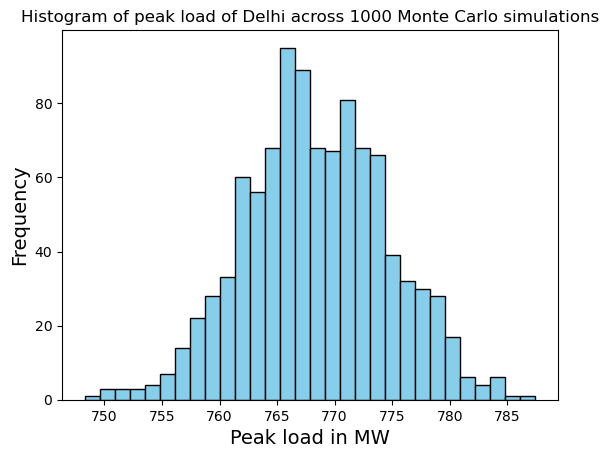

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'peak_load_data' with your actual 1D array
peak_load_data = np.array(peak_s)

# Create a histogram
plt.hist(peak_load_data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Peak load in MW', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of peak load of Delhi across 1000 Monte Carlo simulations' )

# Show the plot
plt.show()


In [90]:
print(len(arr_d1))

0


In [77]:
print(len(result_))

23


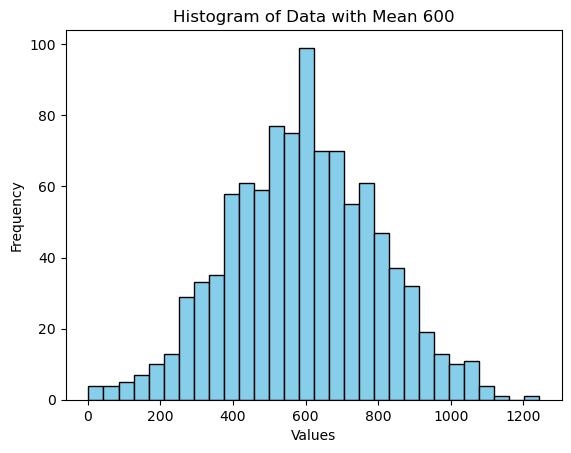

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with a mean of 600
data = np.random.normal(loc=600, scale=200, size=1000)

# Create a histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Mean 600')

# Show the plot
plt.show()


In [89]:
print(len(result_))

1000


In [286]:
delhi=[]
for i in range(778):
    arr=[0]*144
    for j in range(33):
        arr=add_arrays(arr,result_[i][j])
    delhi.append(arr)

NameError: name 'datetime' is not defined

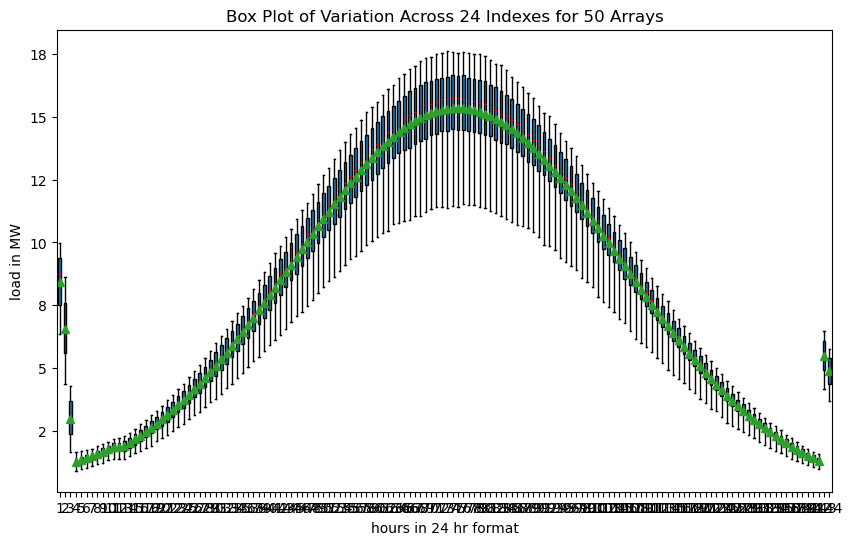

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(area0[7])
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format')
ax.set_ylabel('load in MW')

time_array = np.arange(0, 144) * 10

# Convert the time array to datetime objects
start_time = datetime.strptime("00:00", "%H:%M")
time_objects = [start_time + timedelta(minutes=int(time)) for time in time_array]

# Format the datetime objects to display only the hours
hour_labels = [time.strftime('%H:%M') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, load_data[:len(hour_labels)], marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)')
plt.ylabel('Load')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')



# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


In [276]:
print(delhi[0])

[202272.30000000034, 108361.70000000113, 75661.20000000118, 76180.20000000122, 70971.00000000106, 58913.900000000765, 47033.7000000004, 39555.700000000026, 39477.299999999945, 40774.29999999996, 44580.89999999999, 47680.90000000002, 51232.90000000007, 54536.70000000009, 57700.20000000014, 62557.40000000023, 67613.80000000031, 71184.70000000038, 75441.30000000048, 79691.00000000057, 85039.20000000071, 89652.8000000008, 94866.80000000092, 100882.30000000107, 106693.7000000012, 112537.9000000013, 118302.60000000137, 122664.90000000139, 131144.90000000136, 139004.60000000134, 146482.90000000125, 152704.5000000011, 160201.2000000008, 166936.2000000006, 174289.0000000003, 181289.59999999995, 189802.69999999946, 196263.39999999906, 205727.99999999863, 214590.9999999981, 223050.69999999763, 230769.09999999707, 240331.2999999965, 247631.09999999596, 255432.59999999544, 262746.3999999949, 271747.2999999942, 281158.4999999934, 290466.2999999928, 297598.5999999923, 305639.59999999154, 313257.79999

In [288]:
import numpy as np

# Assuming your 3D array is named 'three_d_array'
# and it has the shape (1000, rows, columns)
# Replace 'three_d_array' with the actual name of your array

# Example: Creating a dummy 3D array with shape (1000, 3, 3)
three_d_array = np.array(result_)

# Define the filename for the text file
file_path = 'output_loadprofile_144.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate through each 2D array in the 3D array
    for i in range(three_d_array.shape[0]):
        # Convert the 2D array to a string
        array_str = np.array2string(three_d_array[i], separator=', ', precision=2, suppress_small=True)

        # Write the string representation of the 2D array to the file
        file.write(f"Array {i + 1}:\n")
        file.write(array_str)
        file.write('\n\n')


In [271]:
a=[]
for i in range(33):
    arr_ai=[]
    for i in range(500):
        arr_ai.append(result_[i][j])
    a.append(arr_ai)
        
    

In [272]:
print(a[3][100])

[4761.800000000047, 2050.900000000043, 2183.3000000000416, 2175.2000000000435, 1359.3999999999905, 782.899999999998, 733.699999999998, 809.7999999999972, 935.2999999999968, 1092.7999999999965, 1120.6999999999957, 1143.5999999999954, 1216.6999999999944, 1254.099999999994, 1398.9999999999927, 1598.0999999999926, 1562.6999999999912, 1675.499999999991, 1863.1999999999903, 1870.999999999989, 1821.7999999999906, 2364.699999999998, 2161.2, 2468.900000000007, 2449.200000000011, 2496.400000000015, 2751.4000000000206, 2971.9000000000283, 3127.7000000000353, 3194.2000000000403, 3386.8000000000447, 3409.0000000000523, 4127.300000000061, 4322.300000000069, 4174.700000000077, 4365.200000000085, 4664.300000000094, 4697.300000000096, 4815.600000000102, 5161.000000000109, 5308.8000000001175, 5531.200000000123, 5463.80000000013, 6110.100000000133, 6010.000000000136, 6287.800000000143, 6398.800000000148, 6663.100000000155, 6682.100000000163, 7298.900000000171, 7496.300000000169, 7436.100000000174, 7686.0

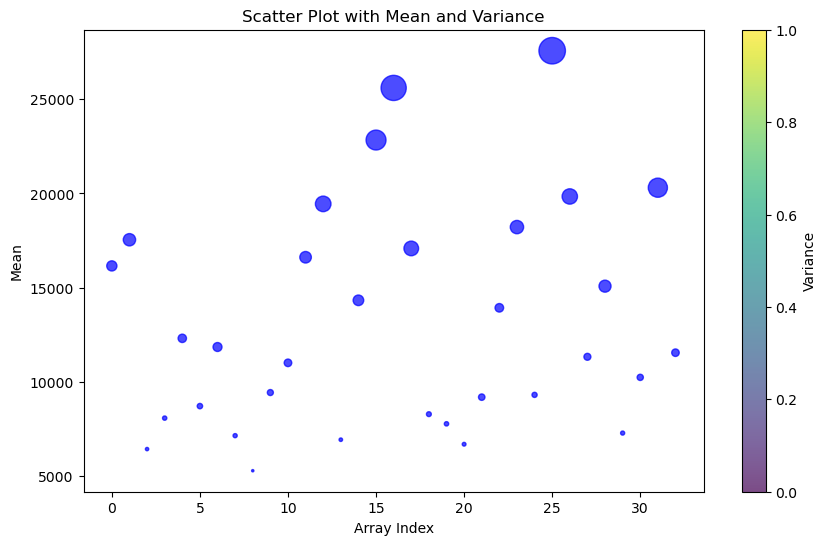

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 33 1D arrays with 1000 elements each
# Replace 'data' with your actual data

# Example: Creating dummy data
data = np.array(a_max)
# Calculate mean and variance for each 1D array
mean_values = np.mean(data, axis=1)
variance_values = np.var(data, axis=1)

# Plot scatter plot with mean as y-axis and variance as point size
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mean_values)), mean_values, s=variance_values/100000, c='blue', alpha=0.7)

# Set labels and title
plt.title('Scatter Plot with Mean and Variance')
plt.xlabel('Array Index')
plt.ylabel('Mean')
plt.colorbar(label='Variance')

plt.show()


In [274]:
print(mean_values)

[16156.9145 17544.3115  6440.857   8083.694  12315.29    8720.224
 11855.4615  7153.262   5293.075   9439.611  11015.407  16615.6585
 19446.711   6938.6    14331.8485 22832.7225 25597.4045 17083.902
  8292.942   7780.5285  6698.004   9195.43   13934.494  18216.2915
  9316.4425 27570.736  19840.409  11335.363  15082.5105  7289.7165
 10244.9225 20305.27   11553.4905]


In [275]:
print(variance_values)

[ 5393972.65533916  7913574.93961725   581340.90505097   958755.46156397
  3650772.45399996  1522001.65432393  4172799.48926791   902248.21355596
   279899.21607501  1892901.41777894  2977012.0538507   6932653.18492721
 12607211.40447709   643968.28779997  5836068.78419756 20605555.32314121
 32901030.75604108 11147578.62239588  1229120.76563596   993187.38953774
   739311.891684    2165349.53739989  3804841.0494638   9234734.77717647
  1390051.50394375 36405981.78652564 12260669.52181778  2520093.83353107
  7536590.07153994   871507.05887776  2029726.05074354 19035970.60220217
  2933035.2184593 ]


In [74]:
print(result_[100][3])

[978.599999999989, 548.799999999996, 327.59999999999957, 226.8000000000006, 131.60000000000022, 187.60000000000045, 337.3999999999994, 499.79999999999677, 663.5999999999941, 1009.3999999999885, 1180.1999999999985, 1478.4000000000178, 1621.200000000027, 1682.800000000031, 1834.000000000041, 1699.6000000000322, 1906.8000000000457, 1961.4000000000492, 2002.0000000000518, 2009.0000000000523, 1800.4000000000387, 1629.6000000000276, 1313.200000000007, 1070.9999999999914]


In [252]:
a_max=[]
for i in range(33):
    a_m=[]
    for j in range(200):
        a_m.append(max(result_[j][i]))
    a_max.append(a_m)
        

In [81]:
print(a_max[0])

[4116.000000000183, 7037.799999999424, 5044.199999999942, 6465.199999999572, 6178.199999999647, 6159.999999999652, 6872.5999999994665, 2496.200000000084, 5732.999999999763, 4543.000000000072, 6901.999999999459, 6693.399999999513, 4288.200000000138, 5396.99999999985, 2660.0000000000946, 2105.6000000000586, 6481.999999999568, 5135.199999999918, 6103.999999999666, 3662.4000000001597, 3805.200000000169, 3670.8000000001603, 3673.6000000001604, 6640.199999999527, 6963.599999999443, 4291.000000000137, 4158.000000000172, 5017.5999999999485, 6078.799999999673, 6969.199999999441, 5081.999999999932, 6697.599999999512, 4673.200000000038, 6953.799999999445, 7012.59999999943, 6010.199999999691, 4888.799999999982, 3199.0000000001296, 3740.800000000165, 3754.8000000001657, 6238.399999999631, 4634.000000000048, 4947.599999999967, 6974.79999999944, 6353.1999999996015, 6017.199999999689, 3698.800000000162, 3661.0000000001596, 4114.600000000183, 5066.599999999936, 6990.199999999436, 4663.400000000041, 643

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming you have the load data in a 1D array named 'load_data'
# Replace 'load_data' with your actual array

# Example: Creating dummy load data
load_data = np.random.randint(50, 200, 144)  # Replace with your actual load data

# Create a time array representing 10-minute intervals
time_array = np.arange(0, 144) * 10

# Convert the time array to datetime objects
start_time = datetime.strptime("00:00", "%H:%M")
time_objects = [start_time + timedelta(minutes=int(time)) for time in time_array]

# Format the datetime objects to display only the hours
hour_labels = [time.strftime('%H:%M') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, load_data[:len(hour_labels)], marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)')
plt.ylabel('Load')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


In [296]:
import numpy as np

# Define the filename
file_path = 'output_loadprofile_144.txt'

# Initialize a list to store arrays
arrays = []

# Open the file in read mode
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_array = []
    for line in lines:
        if line.startswith('Array'):
            # If a new array starts, initialize a new empty array
            current_array = []
        elif line.strip():
            # If the line is not empty, parse it as a numpy array and append to the current array
            current_array.append([float(x.strip()) for x in line.strip().split(',')])
        else:
            # If an empty line is encountered, it indicates the end of the current array
            # Append the current array to the list of arrays
            arrays.append(current_array)

# Convert the list of arrays into a 3D NumPy array
three_d_array = np.array(arrays)

# Print the shape of the resulting 3D array
print("Shape of the 3D array:", three_d_array.shape)



ValueError: could not convert string to float: '[[ 9721.'

In [295]:
print(three_d_array[0])

[]


In [135]:
area0=[]
for j in range(33):
    ar=[]
    for i in range(1000):
        ar.append(result_[i][j])
    area0.append(ar)

In [116]:
import numpy as np

# Create a sample 3D array for demonstration (1000 arrays of size 33x144)
# Replace this with your actual 3D array
# Example: data = np.random.rand(1000, 33, 144)
data = result_

# Calculate the average of the 2D arrays
average_array = np.mean(data, axis=0)

# Print the shape to verify
print("Shape of the average array:", average_array.shape)
print("Average 2D array:\n", average_array)


Shape of the average array: (5, 144)
Average 2D array:
 [[12833.5264 12542.1473 10596.9501  5578.6072  2879.2871  2997.3314
   3126.8695  3273.9727  3427.8525  3600.9453  3790.9172  3994.9478
   4215.8639  4459.6811  4713.4181  4990.0458  5280.0545  5322.6079
   5454.8348  5800.0807  6158.05    6538.6016  6921.5406  7333.1704
   7754.3245  8200.583   8653.8924  9132.3818  9621.5826 10107.4229
  10608.2793 11130.1498 11672.1228 12219.8636 12786.5526 13362.787
  13947.2206 14548.1489 15152.8634 15764.4254 16371.4066 17005.0109
  17653.4914 18293.3357 18929.4835 19561.0968 20201.7716 20836.4542
  21472.0722 22097.1208 22715.2321 23329.7772 23933.2588 24529.0404
  25116.9859 25681.4351 26233.8418 26752.5535 27256.5093 27767.4733
  28249.3051 28692.3082 29102.5894 29497.1777 29878.239  30223.2166
  30541.9005 30840.6491 31088.0043 31333.5514 31525.9365 31694.911
  31825.8345 31907.2392 31954.6139 31973.8471 31938.6342 31911.1153
  31823.5451 31709.333  31576.8938 31389.0875 31180.8831 30934

NameError: name 'load_data' is not defined

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


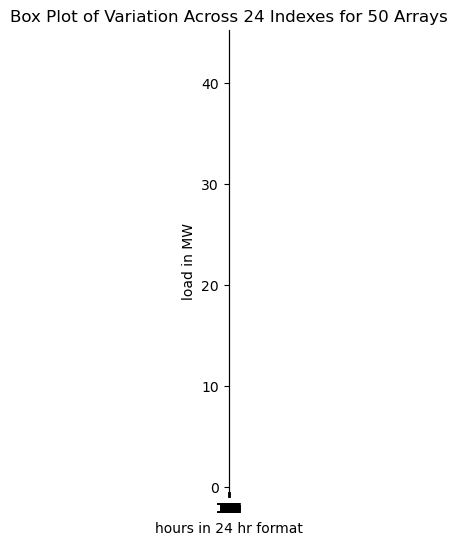

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(area0[0])
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(0, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format')
ax.set_ylabel('load in MW')

time_array = np.arange(0, 144) * 10

# Convert the time array to datetime objects
start_time = datetime.strptime("00:00", "%H:%M")
time_objects = [start_time + timedelta(minutes=int(time)) for time in time_array]

# Format the datetime objects to display only the hours
hour_labels = [time.strftime('%H:%M') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, load_data[:len(hour_labels)], marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)')
plt.ylabel('Load')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')



# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


NameError: name 'load_data' is not defined

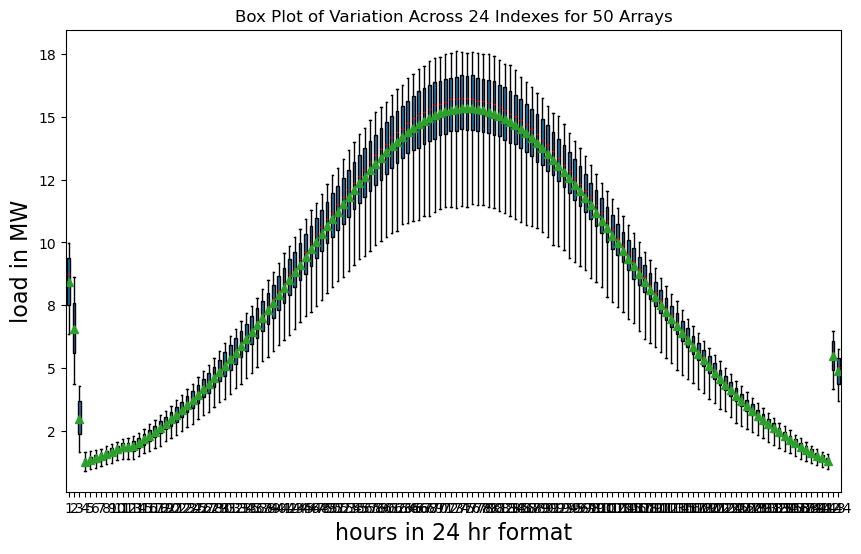

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(area0[7])
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format',fontsize=16)
ax.set_ylabel('load in MW',fontsize=16)

time_array = np.arange(0, 144) * 10

# Convert the time array to datetime objects
start_time = datetime.strptime("00:0", "%H:%M")
time_objects = [start_time + timedelta(minutes=int(time)) for time in time_array]

# Format the datetime objects to display only the hours
hour_labels = [time.strftime('%H:%M') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, load_data[:len(hour_labels)], marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)',fontsize=14)
plt.ylabel('Load',fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')




# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


In [143]:
average_array=[]
for i in range(33):




    average_array.append(np.mean(area0[i], axis=0))




In [139]:
print(np.mean(area0[0],axis=0))

[12866.5619 12574.0234 10620.7291  5593.0577  2877.6919  2990.5932
  3123.6934  3269.8886  3427.2327  3601.9978  3791.4623  4001.6117
  4227.6954  4461.1458  4714.766   4993.7328  5288.031   5338.1698
  5458.1064  5804.7895  6160.7719  6529.2703  6923.5661  7327.1008
  7752.4123  8194.0821  8641.8368  9115.5778  9599.124  10091.3574
 10614.5169 11134.6802 11683.7844 12227.4314 12782.6224 13349.127
 13929.6238 14515.8275 15127.9722 15753.2483 16377.7155 17015.4213
 17635.9901 18276.4494 18917.3488 19555.9137 20211.3805 20843.4655
 21470.4704 22086.5616 22699.9344 23317.9469 23915.9978 24528.2985
 25109.248  25677.881  26229.1869 26765.6868 27275.8569 27775.7538
 28251.734  28707.7794 29127.894  29525.6873 29897.8608 30252.2103
 30571.2613 30864.647  31122.8238 31358.2416 31535.5487 31688.2354
 31806.2869 31887.6769 31954.4176 31963.5639 31969.8668 31927.0891
 31842.9218 31716.7335 31577.409  31393.3529 31185.6622 30932.155
 30648.139  30340.4495 30001.2031 29636.8051 29267.7767 28836.49

In [144]:
print(len(average_array))

33


In [149]:
f=[]
for i in range(33):
    f.append(np.max(average_array[i]))

In [146]:
print(average_array[0])

[12866.5619 12574.0234 10620.7291  5593.0577  2877.6919  2990.5932
  3123.6934  3269.8886  3427.2327  3601.9978  3791.4623  4001.6117
  4227.6954  4461.1458  4714.766   4993.7328  5288.031   5338.1698
  5458.1064  5804.7895  6160.7719  6529.2703  6923.5661  7327.1008
  7752.4123  8194.0821  8641.8368  9115.5778  9599.124  10091.3574
 10614.5169 11134.6802 11683.7844 12227.4314 12782.6224 13349.127
 13929.6238 14515.8275 15127.9722 15753.2483 16377.7155 17015.4213
 17635.9901 18276.4494 18917.3488 19555.9137 20211.3805 20843.4655
 21470.4704 22086.5616 22699.9344 23317.9469 23915.9978 24528.2985
 25109.248  25677.881  26229.1869 26765.6868 27275.8569 27775.7538
 28251.734  28707.7794 29127.894  29525.6873 29897.8608 30252.2103
 30571.2613 30864.647  31122.8238 31358.2416 31535.5487 31688.2354
 31806.2869 31887.6769 31954.4176 31963.5639 31969.8668 31927.0891
 31842.9218 31716.7335 31577.409  31393.3529 31185.6622 30932.155
 30648.139  30340.4495 30001.2031 29636.8051 29267.7767 28836.49

In [147]:
for i in range(33):
    print(max(average_array[i]))

TypeError: 'list' object is not callable

In [148]:
print(type(average_array[0]))

<class 'numpy.ndarray'>


In [150]:
print(f)

[31969.866800000287, 35262.70869999999, 16688.35420000025, 14661.125600000092, 17334.050600000053, 10881.564399999977, 14066.644200000048, 15351.135300000133, 13017.730700000016, 21951.59110000035, 26231.138600000646, 35808.05790000056, 33851.11810000073, 13351.273600000044, 25829.786600000545, 28215.725000000508, 38910.28220000053, 23299.23790000038, 23250.1964000005, 19252.958400000367, 15772.073500000128, 17841.484100000373, 18059.248300000196, 31296.825300000826, 18523.761300000333, 36876.806000000455, 21758.606299999974, 18263.07460000013, 24626.781100000564, 18897.748900000355, 25504.857500000628, 40643.40670000046, 19876.61080000049]


In [151]:
s=[]
for i in range(1000):
    s.append(np.sum(result_[i], axis=0))

In [165]:
print(len(s))

1000


In [159]:
peaks=[]
for i in range(33):
    jk=[]
    for j in range(1000):
        jk.append(np.max(area0[i][j]))
    peaks.append(jk)
    
        
        
        

In [161]:
print(len(peaks[0]))

1000


In [164]:
mean0=[]
var0=[]
import numpy as np
for i in range(33):
   


# Calculate the mean
    mean_value = np.mean(peaks[i])

# Calculate the variance
    variance_value = np.std(peaks[i])
    mean0.append(mean_value)
    var0.append(variance_value)

# Print the results
print(mean0)
print(var0)


[32443.75240000034, 35760.930799999995, 17092.220100000286, 15032.897800000097, 17740.50080000008, 11240.68159999998, 14443.803200000062, 15764.506300000172, 13367.222700000035, 22378.36970000036, 26713.46770000065, 36333.4364000005, 34362.764100000706, 13713.327100000064, 26301.698500000603, 28703.41330000057, 39483.8339000005, 23775.641900000417, 23728.931200000585, 19707.835700000378, 16177.335400000158, 18266.956900000405, 18457.210400000215, 31775.607100000827, 18931.33770000034, 37401.374700000495, 22161.837600000003, 18684.440300000188, 25108.54310000062, 19340.529800000386, 25994.580200000622, 41193.54340000041, 20303.786800000533]
[8268.552723259296, 10765.3103315414, 2296.921181444199, 2888.1852168058967, 3739.5130404052234, 1530.3646518922794, 2296.8680449973913, 1805.3760145218212, 2927.315222693883, 7653.530798831249, 6959.068539476537, 7386.485424731654, 7138.660236106028, 1888.814597560022, 3893.7758625619613, 6721.059496524199, 9284.54049636944, 5130.674888848272, 4103.

In [171]:

for i in range(1000):
    peak_s[i]=peak_s[i]/1000

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(area0[7])
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format')
ax.set_ylabel('load in MW')



') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)',fontsize=14)
plt.ylabel('Load',fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')




# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


SyntaxError: unterminated string literal (detected at line 23) (2013194363.py, line 23)